# Cargar datos y liberías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('train.csv')

print(df.isnull().sum())


# Inciso del ejercicio 6
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=[0, 150000, 300000, float('inf')], labels=['Económica', 'Intermedia', 'Cara'])

X = df.drop(['SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# INCISO 7

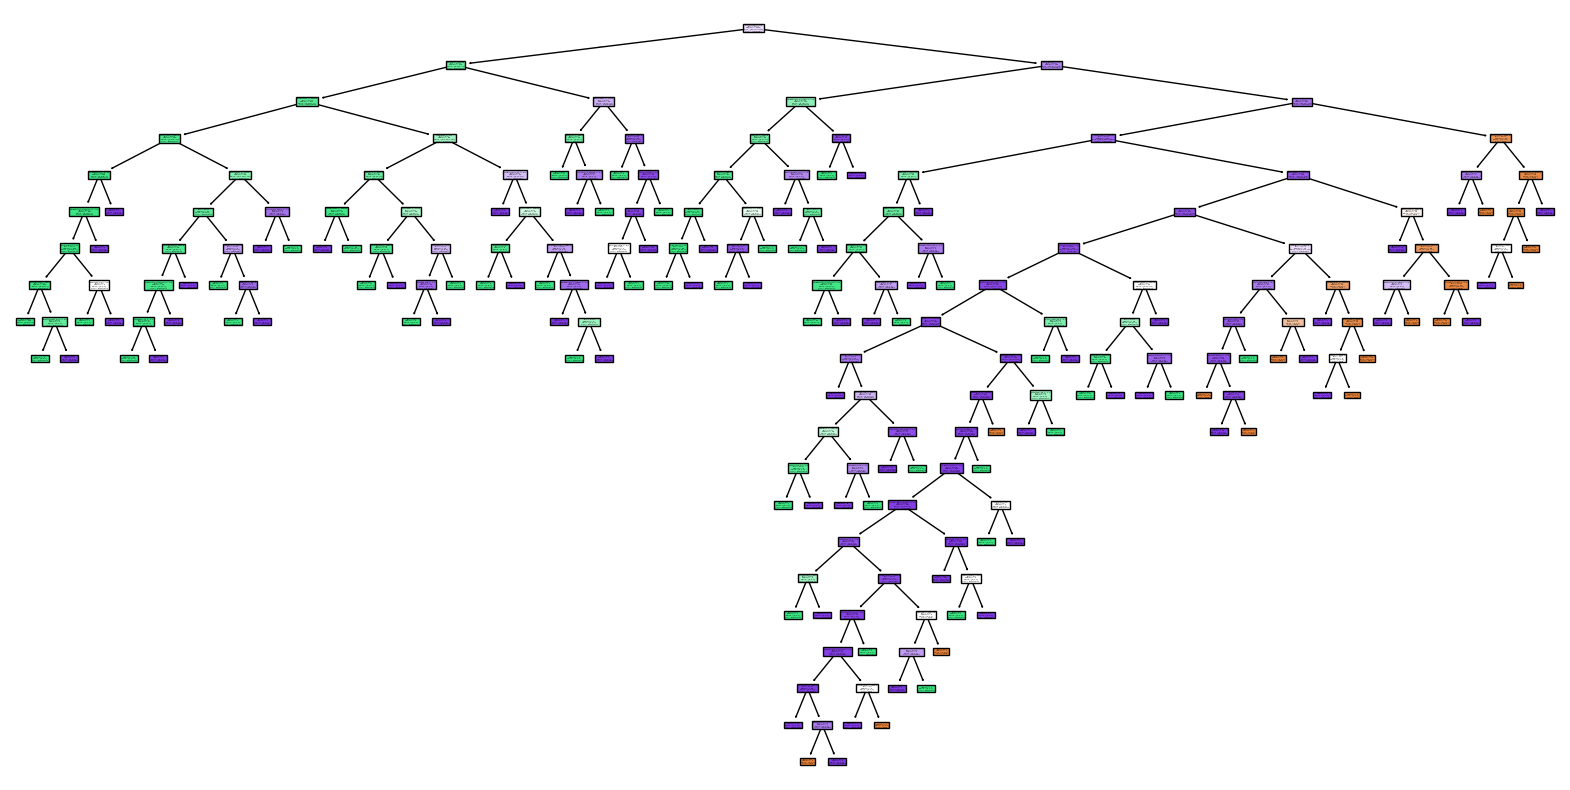

In [3]:
# Entrenar el árbol de clasificación
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualizar el árbol de clasificación
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

# INCISO 8

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))



Precisión del modelo en el conjunto de prueba: 0.82


# INCISO 9

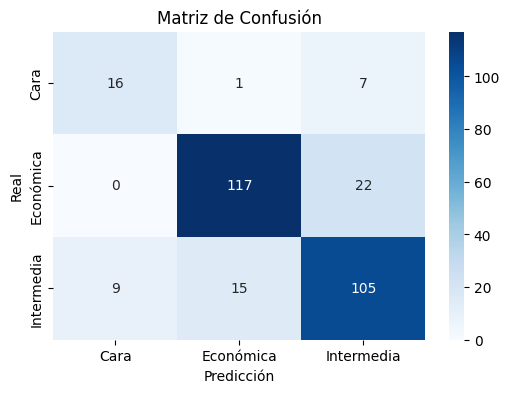

              precision    recall  f1-score   support

        Cara       0.64      0.67      0.65        24
   Económica       0.88      0.84      0.86       139
  Intermedia       0.78      0.81      0.80       129

    accuracy                           0.82       292
   macro avg       0.77      0.77      0.77       292
weighted avg       0.82      0.82      0.82       292



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


# INCISO 10

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Crear el modelo de árbol de decisión
clf_cv = DecisionTreeClassifier(max_depth=5, random_state=42)

# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(clf_cv, X, y, cv=5, scoring='accuracy')

# Imprimir la precisión promedio y la desviación estándar
print(f'Precisión promedio en validación cruzada: {np.mean(cv_scores):.2f}')
print(f'Desviación estándar: {np.std(cv_scores):.2f}')


Precisión promedio en validación cruzada: 0.82
Desviación estándar: 0.02


# INCISO 11

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Profundidades del árbol a probar
depths = [3, 5, 7, 10]

# Diccionario para almacenar las precisiones de cada modelo
results = {}

# Probar diferentes profundidades del árbol
for depth in depths:
    clf_cv = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Realizar validación cruzada con 5 folds
    cv_scores = cross_val_score(clf_cv, X, y, cv=5, scoring='accuracy')
    
    # Almacenar la precisión promedio y desviación estándar
    results[depth] = {
        'mean': np.mean(cv_scores),
        'std': np.std(cv_scores)
    }

# Imprimir los resultados
for depth, result in results.items():
    print(f"Profundidad: {depth}")
    print(f"  Precisión promedio: {result['mean']:.2f}")
    print(f"  Desviación estándar: {result['std']:.2f}")


Profundidad: 3
  Precisión promedio: 0.82
  Desviación estándar: 0.01
Profundidad: 5
  Precisión promedio: 0.82
  Desviación estándar: 0.02
Profundidad: 7
  Precisión promedio: 0.82
  Desviación estándar: 0.02
Profundidad: 10
  Precisión promedio: 0.82
  Desviación estándar: 0.01


# INCISO 12

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Profundidades del árbol a probar
depths = [3, 5, 7, 10]

# Diccionario para almacenar los resultados de ambos modelos
results = {'DecisionTree': {}, 'RandomForest': {}}

# Realizar validación cruzada para Árbol de Decisión
for depth in depths:
    # Árbol de Decisión
    clf_cv = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(clf_cv, X, y, cv=5, scoring='accuracy')
    results['DecisionTree'][depth] = {
        'mean': np.mean(cv_scores),
        'std': np.std(cv_scores)
    }

# Realizar validación cruzada para Random Forest
for depth in depths:
    # Random Forest
    clf_cv_rf = RandomForestClassifier(max_depth=depth, random_state=42)
    cv_scores_rf = cross_val_score(clf_cv_rf, X, y, cv=5, scoring='accuracy')
    results['RandomForest'][depth] = {
        'mean': np.mean(cv_scores_rf),
        'std': np.std(cv_scores_rf)
    }

# Imprimir los resultados de ambos modelos
print("Resultados - Árbol de Decisión vs. Random Forest")
for depth in depths:
    print(f"\nProfundidad: {depth}")
    print(f"  Árbol de Decisión: Precisión promedio = {results['DecisionTree'][depth]['mean']:.2f}, Desviación estándar = {results['DecisionTree'][depth]['std']:.2f}")
    print(f"  Random Forest: Precisión promedio = {results['RandomForest'][depth]['mean']:.2f}, Desviación estándar = {results['RandomForest'][depth]['std']:.2f}")


Resultados - Árbol de Decisión vs. Random Forest

Profundidad: 3
  Árbol de Decisión: Precisión promedio = 0.82, Desviación estándar = 0.01
  Random Forest: Precisión promedio = 0.82, Desviación estándar = 0.03

Profundidad: 5
  Árbol de Decisión: Precisión promedio = 0.82, Desviación estándar = 0.02
  Random Forest: Precisión promedio = 0.85, Desviación estándar = 0.01

Profundidad: 7
  Árbol de Decisión: Precisión promedio = 0.82, Desviación estándar = 0.02
  Random Forest: Precisión promedio = 0.87, Desviación estándar = 0.02

Profundidad: 10
  Árbol de Decisión: Precisión promedio = 0.82, Desviación estándar = 0.01
  Random Forest: Precisión promedio = 0.88, Desviación estándar = 0.02
